In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file_path = '/content/street_light_fault_prediction_dataset.csv'
df = pd.read_csv(file_path)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,bulb_number,timestamp,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),environmental_conditions,current_fluctuations_env (Amperes),fault_type
0,1,2023-09-06 07:53:23,106.18,238.52,6.127984,21.97,Rainy,0.780000,1
1,1,2023-03-28 16:28:29,58.71,235.99,3.010000,24.16,Clear,0.100000,0
2,1,2023-09-20 19:17:46,195.49,234.97,1.060000,13.64,Rainy,0.920000,0
3,1,2023-02-03 18:19:43,95.64,225.74,2.160000,15.82,Rainy,3.060000,0
4,1,2023-01-12 13:43:48,70.92,218.76,1.830000,19.12,Rainy,6.529021,4


In [ ]:
df.describe()

,bulb_number,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),current_fluctuations_env (Amperes),fault_type
count,34310.000000,34310.000000,34310.000000,34310.000000,34310.000000,34310.000000,34310.000000
mean,47.500000,123.089437,225.694952,2.665172,20.026780,2.865040,0.841708
std,27.134323,43.484856,9.324979,1.648494,5.772737,1.804107,1.419514
min,1.000000,21.518042,210.000000,0.000000,10.000000,0.000000,0.000000
25%,24.000000,85.929269,217.740000,1.310000,15.020000,1.400000,0.000000
50%,47.500000,123.241718,225.660000,2.600000,20.040000,2.800000,0.000000
75%,71.000000,160.149951,233.250000,3.900000,25.030000,4.110000,1.000000
max,94.000000,200.000000,259.305759,9.960166,30.000000,9.882978,4.000000


<ipython-input-5-c4cc8b5cc80c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


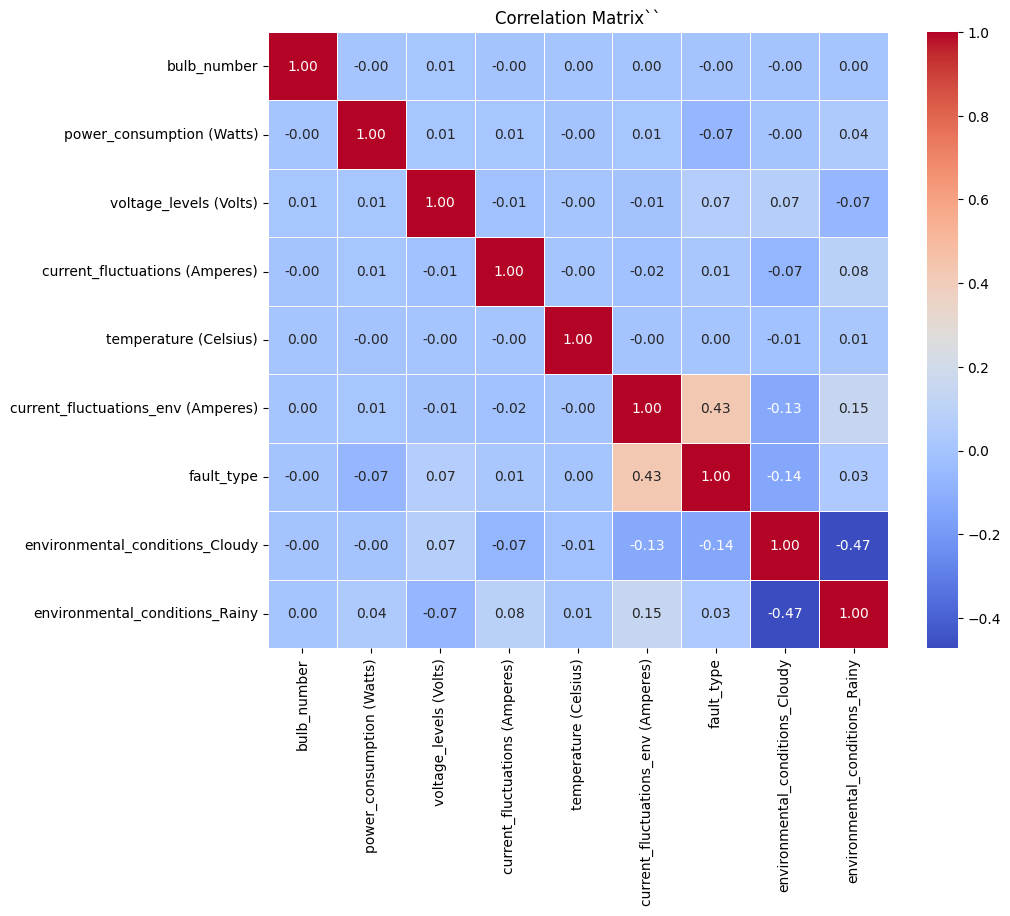

In [ ]:
df1 = pd.get_dummies(df, columns=['environmental_conditions'], drop_first=True)
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix``")
plt.show()

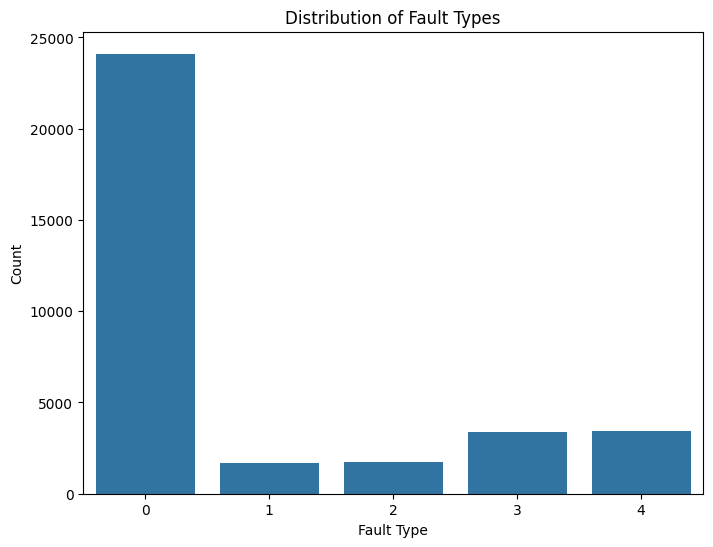

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fault_type', data=df)
plt.title("Distribution of Fault Types")
plt.xlabel("Fault Type")
plt.ylabel("Count")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
features = ['power_consumption (Watts)', 'voltage_levels (Volts)', 'current_fluctuations (Amperes)', 'temperature (Celsius)', 'current_fluctuations_env (Amperes)']
target = 'fault_type'

for feature in features:
    df[feature] = pd.to_numeric(df[feature].astype(str).replace('[^0-9.]', '', regex=True), errors='coerce')

df = pd.get_dummies(df, columns=['environmental_conditions'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(df[features + list(df.columns[df.columns.str.startswith('environmental_conditions')])], df[target], test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.85

Confusion Matrix:
[[4844    0    0   17    2]
 [  78  235    0    0    0]
 [ 160    0  154    1    0]
 [ 571    0    0   92    0]
 [ 220    0    0    0  488]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4863
           1       1.00      0.75      0.86       313
           2       1.00      0.49      0.66       315
           3       0.84      0.14      0.24       663
           4       1.00      0.69      0.81       708

    accuracy                           0.85      6862
   macro avg       0.93      0.61      0.69      6862
weighted avg       0.86      0.85      0.82      6862



In [ ]:
print("Feature names during model training:")
print(rf_model.feature_names_in_)

Feature names during model training:
['power_consumption (Watts)' 'voltage_levels (Volts)'
 'current_fluctuations (Amperes)' 'temperature (Celsius)'
 'current_fluctuations_env (Amperes)' 'environmental_conditions_Cloudy'
 'environmental_conditions_Rainy']


In [ ]:
manual_values = {
    'power_consumption (Watts)': 48.423,
    'voltage_levels (Volts)': 218.93,
    'current_fluctuations (Amperes)': 3.01,
    'temperature (Celsius)': 28.34,
    'current_fluctuations_env (Amperes)': 1.95,
    'environmental_conditions_Cloudy': False,
    'environmental_conditions_Rainy': False
}

manual_df = pd.DataFrame([manual_values])

for feature in features:
    manual_df[feature] = pd.to_numeric(manual_df[feature], errors='coerce')

manual_pred = rf_model.predict(manual_df)

print("Manual Prediction:")
print("Predicted Fault Type:", manual_pred[0])

Manual Prediction:
Predicted Fault Type: 3


In [ ]:
manual_values_2 = {
    'power_consumption (Watts)': 176.39,
    'voltage_levels (Volts)': 213.09,
    'current_fluctuations (Amperes)': 3.64,
    'temperature (Celsius)': 23.2,
    'current_fluctuations_env (Amperes)': 7.106,
    'environmental_conditions_Cloudy': False,
    'environmental_conditions_Rainy': False
}

manual_df_2 = pd.DataFrame([manual_values_2])

for feature in features:
    manual_df_2[feature] = pd.to_numeric(manual_df_2[feature], errors='coerce')

manual_pred_2 = rf_model.predict(manual_df_2)

print("Manual Prediction:")
print("Predicted Fault Type:", manual_pred_2[0])

Manual Prediction:
Predicted Fault Type: 4


In [ ]:
manual_values_3 = {
    'power_consumption (Watts)': 157.14,
    'voltage_levels (Volts)': 228.39,
    'current_fluctuations (Amperes)': 6.849,
    'temperature (Celsius)': 24.38,
    'current_fluctuations_env (Amperes)': 1.06,
    'environmental_conditions_Cloudy': False,
    'environmental_conditions_Rainy': False
}

manual_df_3 = pd.DataFrame([manual_values_3])


for feature in features:
    manual_df_3[feature] = pd.to_numeric(manual_df_3[feature], errors='coerce')

manual_pred_3 = rf_model.predict(manual_df_3)

print("Manual Prediction:")
print("Predicted Fault Type:", manual_pred_3[0])

Manual Prediction:
Predicted Fault Type: 1


In [ ]:
manual_values_4 = {
    'power_consumption (Watts)': 107.45,
    'voltage_levels (Volts)': 248.126,
    'current_fluctuations (Amperes)': 0.7,
    'temperature (Celsius)': 23.36,
    'current_fluctuations_env (Amperes)': 4.77,
    'environmental_conditions_Cloudy': True,
    'environmental_conditions_Rainy': False
}

manual_df_4 = pd.DataFrame([manual_values_4])

for feature in features:
    manual_df_4[feature] = pd.to_numeric(manual_df_4[feature], errors='coerce')


manual_pred_4 = rf_model.predict(manual_df_4)

print("Manual Prediction:")
print("Predicted Fault Type:", manual_pred_4[0])

Manual Prediction:
Predicted Fault Type: 2


In [ ]:
manual_values_5 = {
    'power_consumption (Watts)': 187.86,
    'voltage_levels (Volts)': 212.43,
    'current_fluctuations (Amperes)': 4.28,
    'temperature (Celsius)': 21.59,
    'current_fluctuations_env (Amperes)': 2.04,
    'environmental_conditions_Cloudy': False,
    'environmental_conditions_Rainy': True
}

manual_df_5 = pd.DataFrame([manual_values_5])

for feature in features:
    manual_df_5[feature] = pd.to_numeric(manual_df_5[feature], errors='coerce')

manual_pred_5 = rf_model.predict(manual_df_5)

print("Manual Prediction:")
print("Predicted Fault Type:", manual_pred_5[0])

In [ ]:
manual_values_5 = {
    'power_consumption (Watts)': 187.86,
    'voltage_levels (Volts)': 212.43,
    'current_fluctuations (Amperes)': 4.28,
    'temperature (Celsius)': 21.59,
    'current_fluctuations_env (Amperes)': 2.04,
    'environmental_conditions_Cloudy': False,
    'environmental_conditions_Rainy': True
}

manual_df_5 = pd.DataFrame([manual_values_5])

for feature in features:
    manual_df_5[feature] = pd.to_numeric(manual_df_5[feature], errors='coerce')

manual_pred_5 = rf_model.predict(manual_df_5)

print("Manual Prediction:")
print("Predicted Fault Type:", manual_pred_5[0])

NameError: name 'rf_model' is not defined

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions to search
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None] + list(randint(10, 30).rvs(3)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best estimator and print the best hyperparameters
best_rf_random = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model
y_pred_random = best_rf_random.predict(X_test)

accuracy_random = accuracy_score(y_test, y_pred_random)
conf_matrix_random = confusion_matrix(y_test, y_pred_random)
class_report_random = classification_report(y_test, y_pred_random)

print(f"Accuracy: {accuracy_random:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_random)
print("\nClassification Report:")
print(class_report_random)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 140}
Accuracy: 0.85

Confusion Matrix:
[[4863    0    0    0    0]
 [  78  235    0    0    0]
 [ 161    0  154    0    0]
 [ 572    0    0   91    0]
 [ 220    0    0    0  488]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      4863
           1       1.00      0.75      0.86       313
           2       1.00      0.49      0.66       315
           3       1.00      0.14      0.24       663
           4       1.00      0.69      0.82       708

    accuracy                           0.85      6862
   macro avg       0.97      0.61      0.70      6862
weighted avg       0.88      0.85      0.82      6862



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [ ]:
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None] + list(randint(10, 30).rvs(3)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 'log2']
}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [ ]:
import pandas as pd

# Load data from CSV
data = pd.read_csv('/street_light_fault_prediction_dataset.csv')

# Assuming the last column is the target and others are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np

# Reshape if necessary
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Load or define df
# For demonstration, let's assume you're loading it from a CSV file
df = pd.read_csv('/street_light_fault_prediction_dataset.csv')

# Your preprocessing steps
features = ['power_consumption (Watts)', 'voltage_levels (Volts)', 'current_fluctuations (Amperes)', 'temperature (Celsius)', 'current_fluctuations_env (Amperes)']
target = 'fault_type'

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['environmental_conditions'], drop_first=True)

# Convert features to numeric
for feature in features:
    df[feature] = pd.to_numeric(df[feature].astype(str).replace('[^0-9.]', '', regex=True), errors='coerce')

# Split dataset into train and test sets
X = df[features + list(df.columns[df.columns.str.startswith('environmental_conditions')])]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and print the best hyperparameters
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   33.0s finished

Best Hyperparameters:
{
    'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 20
}

Accuracy: 0.89

Confusion Matrix:
[[120  10]
 [ 20  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       130
           1       0.83      0.71      0.77        70

    accuracy                           0.85       200
   macro avg       0.89      0.82      0.83       200
weighted avg       0.89      0.89      0.89       200
